#  1.Understanding the dataset
    Title: Haberman’s Survival Data
    Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
    Attribute Information:
    Age of patient at the time of operation (numerical)
    Patient’s year of operation (year — 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) :
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 years

In [1]:
#importing the libraries and loading the file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

haberman = pd.read_csv("haberman.csv")
haberman.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
#understanding the dataset
print(haberman.shape)

(306, 4)


In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#brief info about the dataset
print(haberman.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


# Observations
1. There are no missing values in this data set.
2. All the columns are of the integer data type.
3. The datatype of the status is an integer, it has to be converted to a categorical datatype
4. In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years


In [5]:
#mapping the values of 1 and 2 to yes and no respectively and
#printing the first 5 records from the dataset.

haberman['status'] = haberman['status'].map({1:'Yes', 2:'No'})
haberman.head()



,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [6]:
#describe the data set

haberman.describe()


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [7]:
#gives each count of the status count

haberman["status"].value_counts()



Yes    225
No      81
Name: status, dtype: int64

# (2)   Bi - Variate Analyis
# (2.1) 2-D Scatter Plot


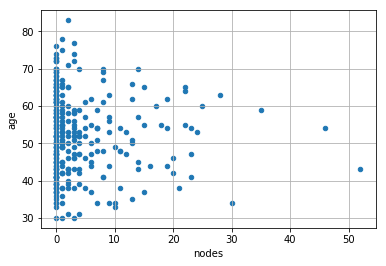

In [8]:

haberman.plot(kind = "scatter", x= "nodes" ,y = "age")
plt.grid()
plt.show()

# Observations:
1. features are not lineraly seperable.
2. Hence ,cant make much sense out of it.

# (2.2)Pair-Plot

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


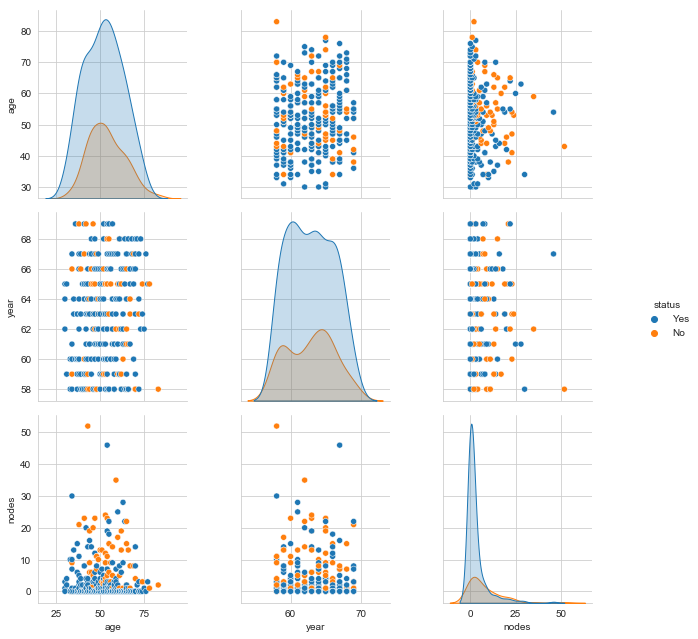

In [9]:
import matplotlib.pyplot as plt
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue = 'status', size=3,x_vars=['age','year', 'nodes'],y_vars =['age','year', 'nodes'])
plt.show()

# observations
 1.any of the plot is not giving reasonalbe result.
 
 2.any of features is not linearly seperable.


# 3.Univariate Analysis

# Histogram,PDF,CDF

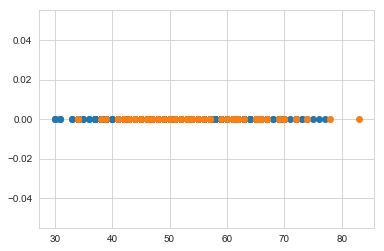

In [10]:
#histogram ,PDF and CDF.
#1-d scatter plot using one feature.

haberman_status1 = haberman.loc[haberman["status"] == "Yes"];
haberman_status2 = haberman.loc[haberman["status"] == "No"];
plt.plot(haberman_status1["age"],np.zeros_like(haberman_status1["age"]),"o")
plt.plot(haberman_status2["age"],np.zeros_like(haberman_status2["age"]),"o")
plt.show()





C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


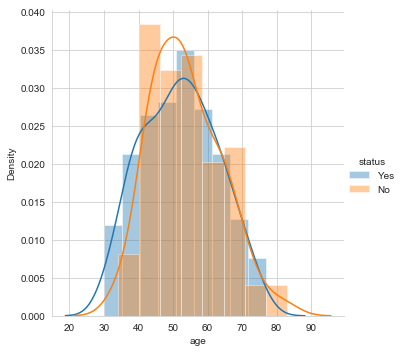

In [23]:
#ploting histogram to distinguish our class level status
#using age feature here

sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# Observations:
    1.Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
    2.Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
    3.Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


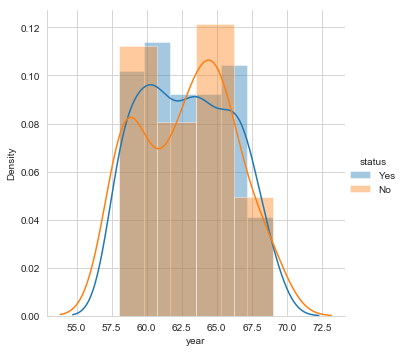

In [20]:
#ploting histogram to distinguish our class level status
#using year feature here


sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

# Observations:
    1. There is major overlapping observed. This graph only tells how many of the operations were successful and how many                weren’t. This cannot be a parameter to decide the patient’s survival chances.
    2. However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


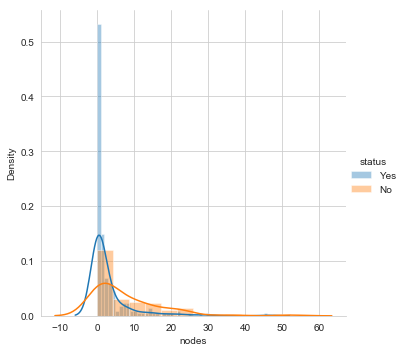

In [21]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# Obervations
    1. Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25            or more nodes.


# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


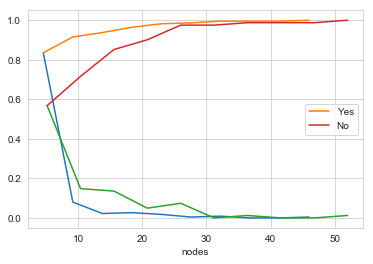

In [13]:
counts1, bin_edges1 = np.histogram(haberman_status1['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(haberman_status2['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

# Observations:
    1. 83 % of the patients who have survived had nodes in the range of 0–4.6


# Box Plot and Whiskers


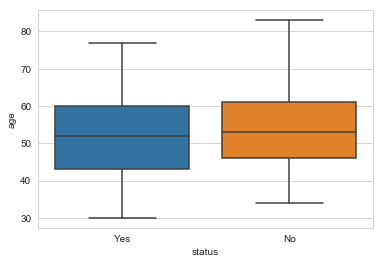

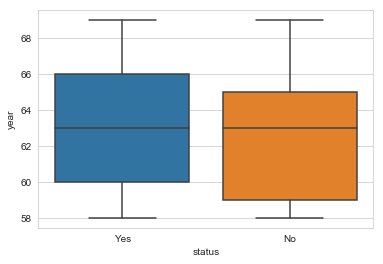

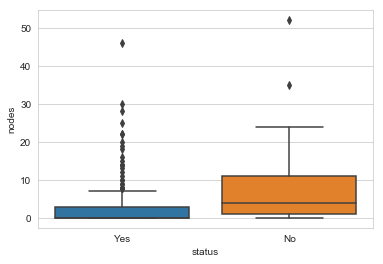

In [16]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.


sns.boxplot(x ="status", y ="age", data = haberman)
plt.show()


sns.boxplot( x = "status", y = "year",data = haberman)
plt.show()

sns.boxplot( x = "status", y = "nodes",data = haberman)
plt.show()




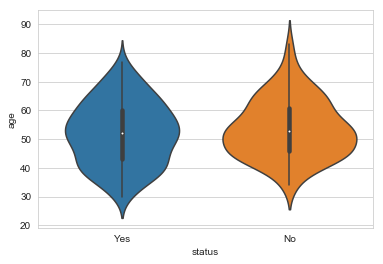

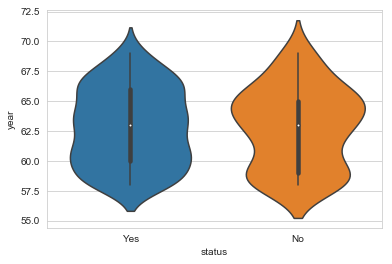

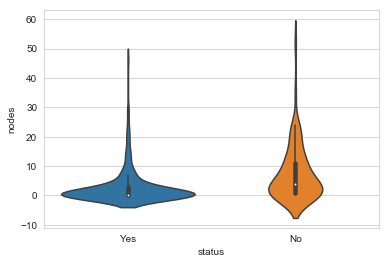

In [18]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='status',y='age',data = haberman,height = 10)
plt.show()

sns.violinplot(x='status',y='year',data = haberman,height = 10)
plt.show()

sns.violinplot(x='status',y='nodes',data = haberman,height = 10)
plt.show()

# Observations:
     1. Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
     2. A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
     3. There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
     4. There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
     5. The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients

# Conclusions:
    1.Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
    2.Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.
    3.The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.